# Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [50]:
#Load the heart disease dataset
df=pd.read_csv(r'C:\\Users\\delll\\Desktop\\Python\\DataSets\\heart_disease.xls')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape
# rows=303,columns=14

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()
#There is no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
m=df.describe()

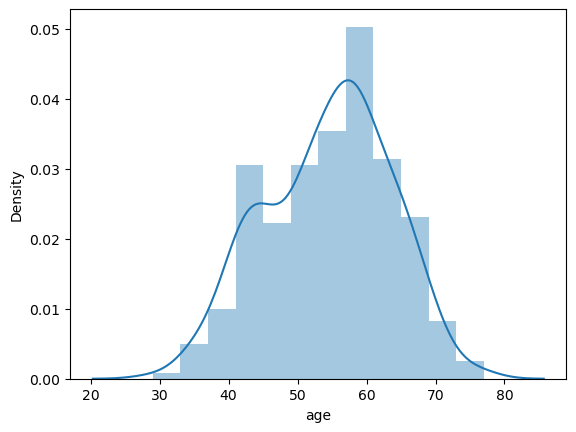

skewness: -0.2024633654856539
Kurtosis: -0.5421671409908408


In [52]:
sns.distplot(df['age'])
plt.show()
print("skewness:",df['age'].skew())
print("Kurtosis:",df['age'].kurtosis())

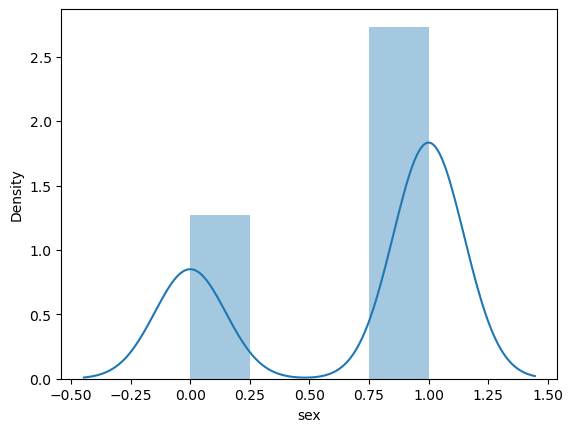

skewness: -0.791335191480832
Kurtosis: -1.3829609835171006


In [53]:
sns.distplot(df['sex'])
plt.show()
print("skewness:",df['sex'].skew())
print("Kurtosis:",df['sex'].kurtosis())

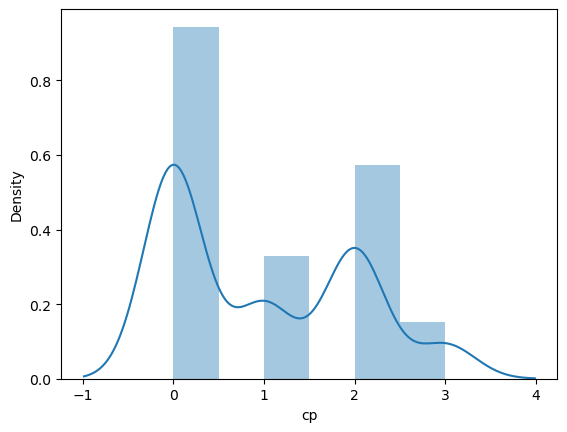

skewness: 0.48473236883889675
Kurtosis: -1.1930709803257231


In [54]:
sns.distplot(df['cp'])
plt.show()
print("skewness:",df['cp'].skew())
print("Kurtosis:",df['cp'].kurtosis())

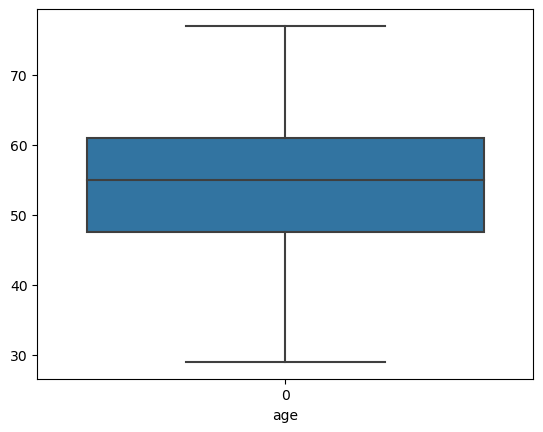

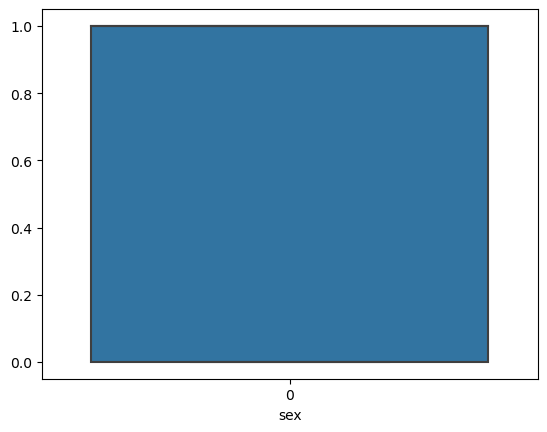

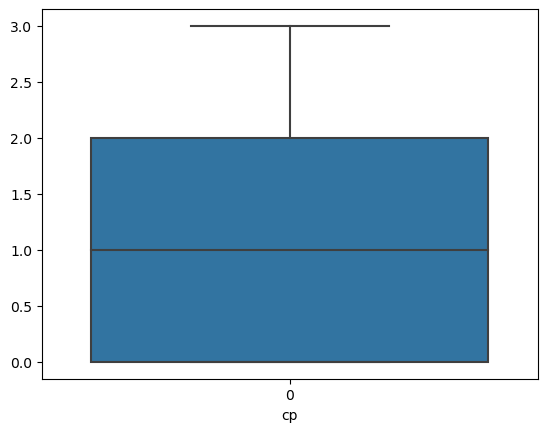

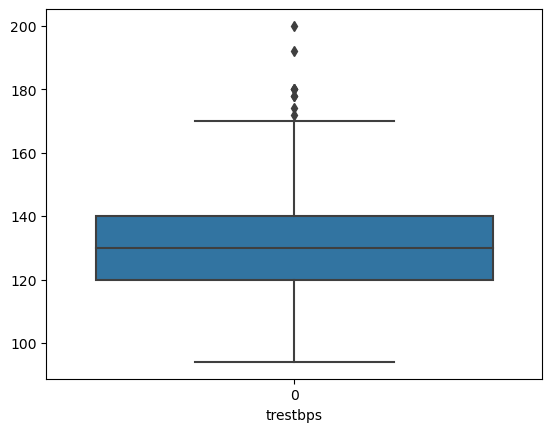

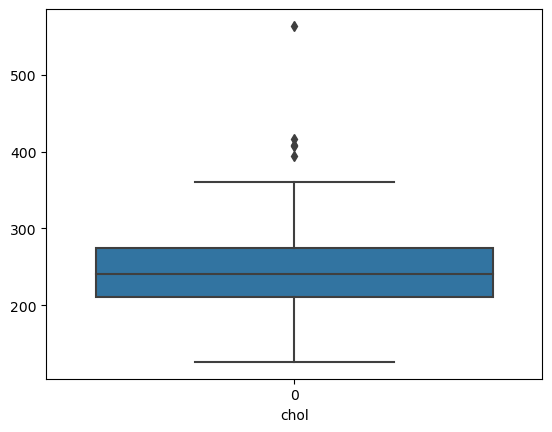

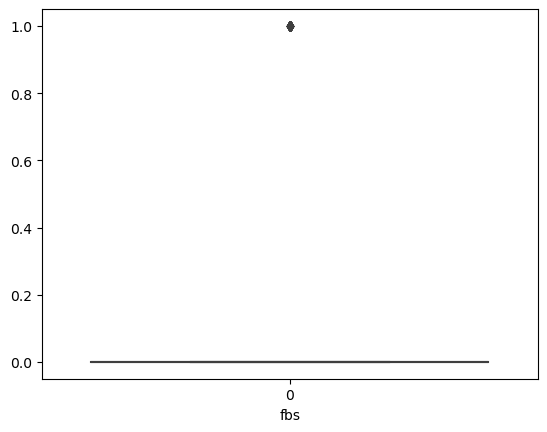

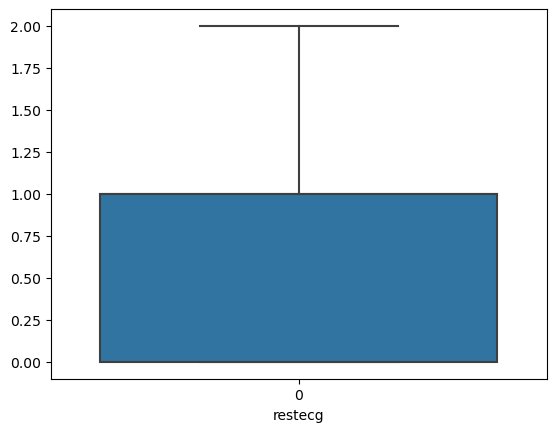

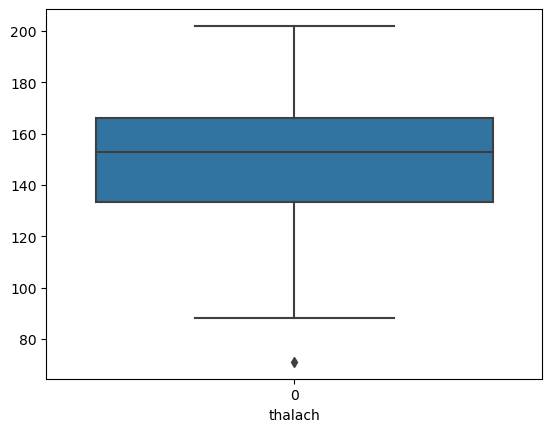

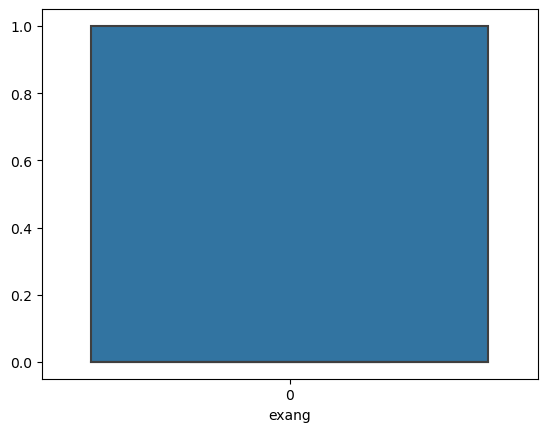

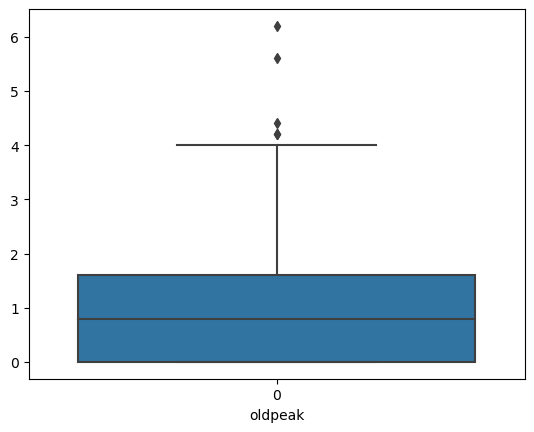

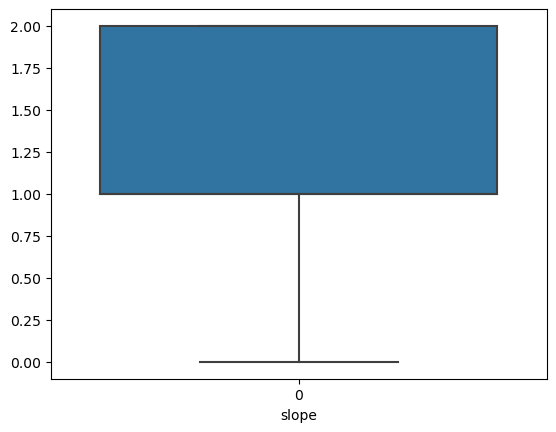

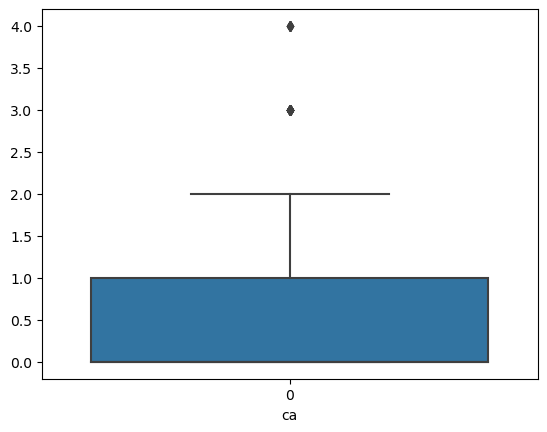

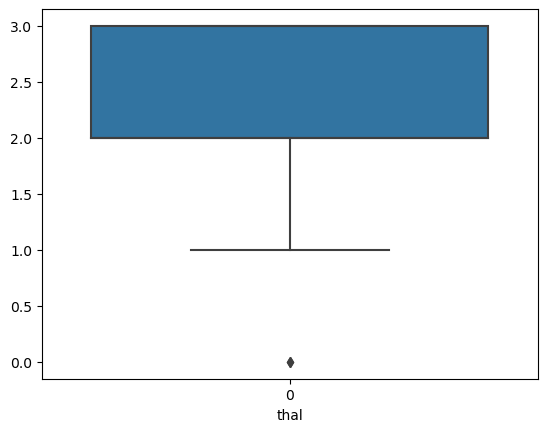

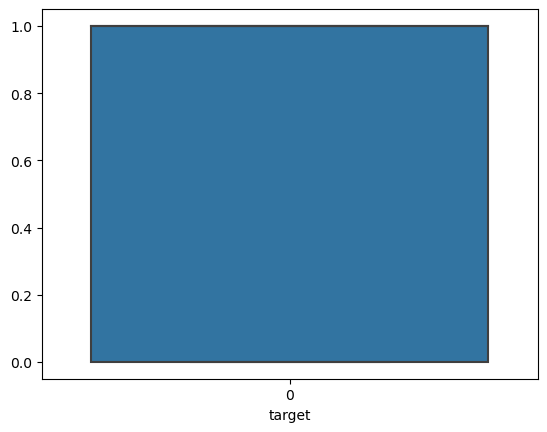

In [58]:
l=m.columns
for i in range(0,len(m.columns)):
    sns.boxplot(df[l[i]])
    plt.xlabel(l[i])
    plt.show() 

In [59]:
#No Outlier columns=Age,cp,restecg,slope
#Columns with outliers=trestbps,chol,thalach,oldpeak,ca,thal
#dosen't form boxplot correctly=sex,fbs,exang,target

In [60]:
#To remove the outlier use winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['trestbps','chol','thalach','oldpeak','ca','thal'])

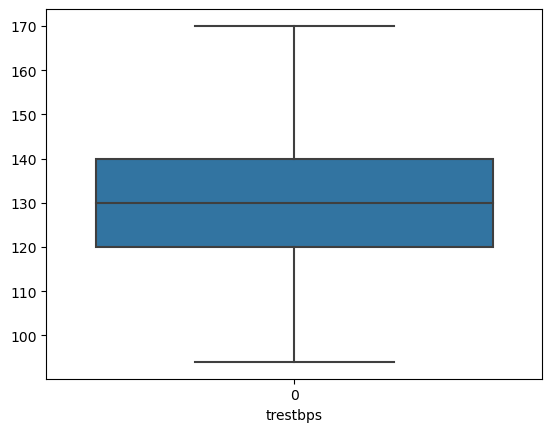

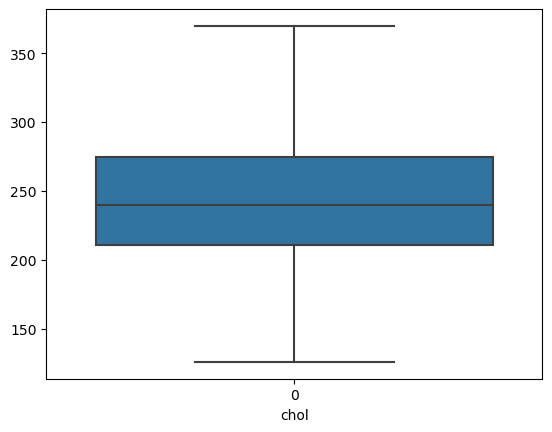

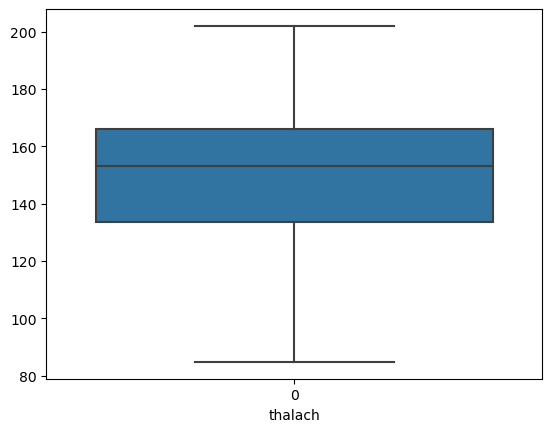

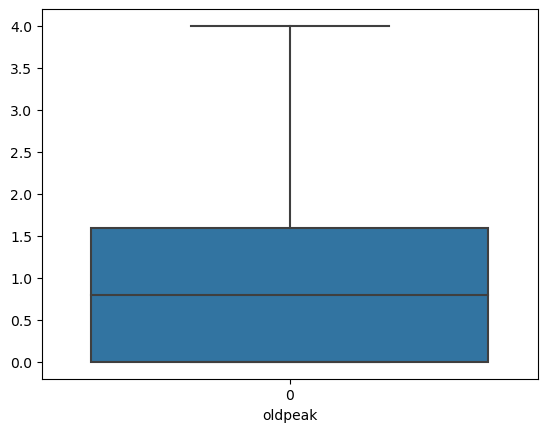

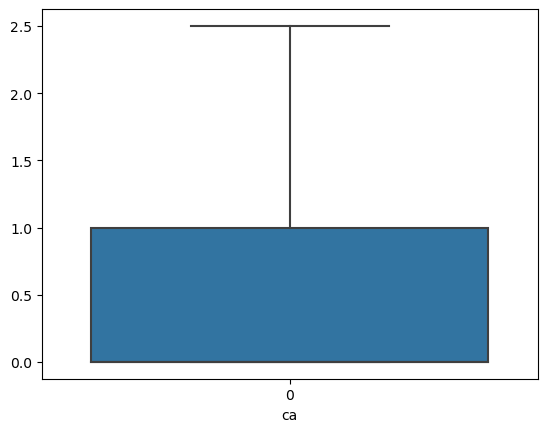

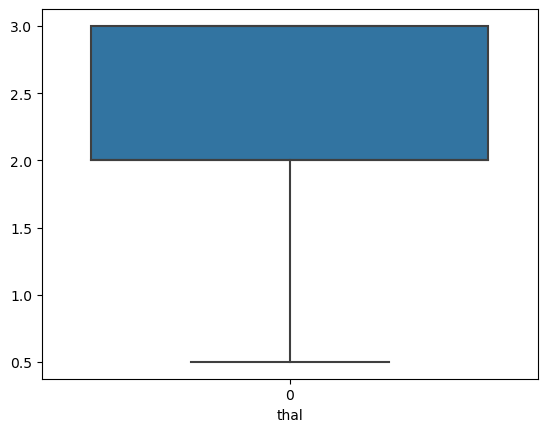

In [61]:
var=['trestbps','chol','thalach','oldpeak','ca','thal']
df[var]=winsor.fit_transform(df[var])
for i in range(0,len(var)):
    sns.boxplot(df[var[i]])
    plt.xlabel(var[i])
    plt.show() 
#from boxplot we easily see that outliers are removed..

# Bivariate Analysis

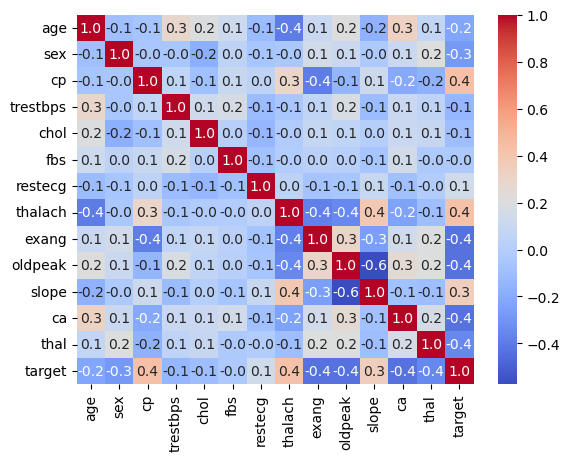

In [64]:
#Heatmap
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.1f')
plt.show()

In [65]:
#All columns are  weakly related to each other

In [66]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
df_norm=norm_fun(df)
b=df_norm.describe()

In [67]:
df_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.671053,0.438974,1.0,0.0,0.556503,0.0,0.575,0.0,0.0,0.2,1.0
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,0.0,0.0,0.6,1.0
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,1.0,0.0,0.6,1.0
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,1.0,0.0,0.6,1.0
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,1.0,0.0,0.6,1.0


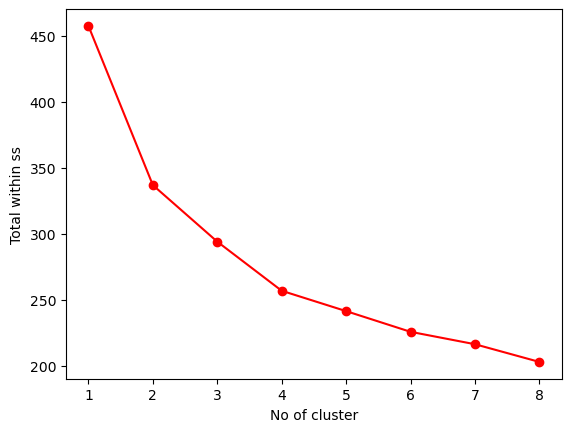

In [69]:
#Before PCA K means Clustering
TWSS=[]
k=list(range(1,9))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS,'ro-')
plt.xlabel('No of cluster')
plt.ylabel('Total within ss')
plt.show()

In [70]:
Model=KMeans(n_clusters=4)
Model.fit(df_norm)
Model.labels_

array([3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 2, 0,
       3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0,
       3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,

In [71]:
KCluster=pd.Series(Model.labels_)
df['KCluster']=KCluster

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,KCluster
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1,3
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,3
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1,0
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,3
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1,0


In [73]:
df_norm['KCluster']=KCluster

In [74]:
df_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,KCluster
0,0.708333,1.0,1.000000,0.671053,0.438974,1.0,0.0,0.556503,0.0,0.575,0.0,0.0,0.2,1.0,3
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,0.0,0.0,0.6,1.0,3
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,1.0,0.0,0.6,1.0,0
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,1.0,0.0,0.6,1.0,3
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,1.0,0.0,0.6,1.0,0


In [82]:
df_norm.shape

(303, 15)

In [86]:
x=df_norm.iloc[:,:13]

In [87]:
y=df['target']

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [89]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)
#Accuracy of model before pca=87%

0.8688524590163934

In [100]:
from sklearn.decomposition import PCA
pca=PCA(6)
df_pca=pca.fit_transform(x)

In [101]:
df_pca

array([[-0.15473629, -0.38326167,  0.92584585,  0.78819566,  0.72880382,
        -0.1949079 ],
       [-0.08883062, -0.34204341,  0.02189077,  0.09429742,  1.0173421 ,
        -0.12532133],
       [-0.66869958,  0.43749054, -0.17071039, -0.00640683, -0.01844182,
        -0.09095355],
       ...,
       [ 0.43207702, -0.27453206,  1.0388107 , -0.19161718,  0.02826323,
        -0.45299243],
       [ 0.85512114, -0.03120458, -0.29912533, -0.03318828,  0.00556323,
         0.02075828],
       [-0.51516681,  0.52831667,  0.13095758, -0.22540093,  0.03410605,
        -0.04685413]])

In [102]:
df_pca.shape

(303, 6)

In [103]:
pca.explained_variance_ratio_

array([0.25163666, 0.16452921, 0.1195218 , 0.09329594, 0.08875266,
       0.06030029])

In [104]:
pca.n_components

6

In [105]:
from sklearn.model_selection import train_test_split
x_train_pca,x_test_pca,y_train,y_test=train_test_split(df_pca,y,test_size=0.2,random_state=30)

In [106]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)
#Accuracy of model After pca=83%

0.8360655737704918

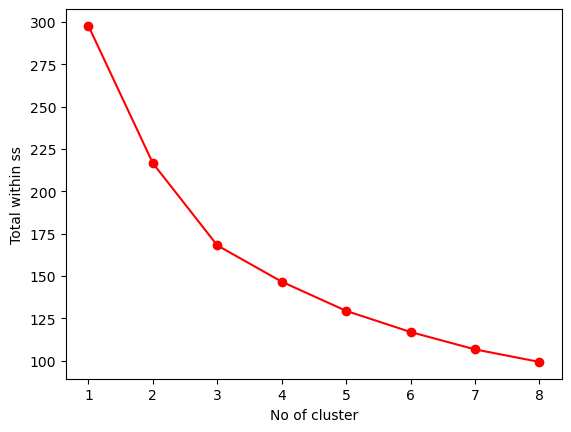

In [107]:
#After PCA k means clustering
TWSS=[]
k=list(range(1,9))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS,'ro-')
plt.xlabel('No of cluster')
plt.ylabel('Total within ss')
plt.show()

In [108]:
Model=KMeans(n_clusters=4)
Model.fit(df_pca)
Model.labels_

array([0, 1, 2, 1, 3, 1, 2, 1, 0, 1, 1, 2, 1, 3, 2, 2, 2, 2, 1, 2, 1, 3,
       1, 0, 3, 2, 0, 1, 2, 0, 2, 1, 1, 1, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       3, 2, 1, 2, 1, 3, 1, 3, 2, 2, 0, 3, 0, 3, 1, 1, 2, 0, 2, 2, 1, 0,
       2, 2, 0, 3, 1, 0, 2, 3, 2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 3, 2, 2,
       3, 0, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2,
       1, 1, 2, 2, 2, 0, 3, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 2, 1, 0, 0, 1, 1, 1, 3, 3,
       0, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 0,
       3, 1, 1, 3, 3, 0, 2, 3, 3, 2, 1, 3, 1, 3, 1, 3, 0, 0, 2, 0, 1, 0,
       2, 3, 0, 0, 3, 3, 1, 3, 1, 3, 1, 0, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 0, 0, 3, 1, 3, 3, 3, 3, 3, 0, 1, 3, 3,
       3, 3, 3, 1, 3, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 3, 0, 0, 1, 3, 3,
       1, 1, 3, 3, 1, 1, 0, 1, 3, 3, 3, 0, 3, 1, 0,

In [116]:
df_pca=pd.DataFrame(df_pca)
KCluster=pd.Series(Model.labels_)
df_pca['KCluster']=KCluster
df_pca.columns=['c0','c1','c2','c3','c4','c5',"KCluster"]

In [117]:
df_pca.head()

,c0,c1,c2,c3,c4,c5,KCluster
0,-0.154736,-0.383262,0.925846,0.788196,0.728804,-0.194908,0
1,-0.088831,-0.342043,0.021891,0.094297,1.017342,-0.125321,1
2,-0.668700,0.437491,-0.170710,-0.006407,-0.018442,-0.090954,2
3,-0.360561,-0.448051,-0.298038,-0.045885,-0.063632,-0.086676,1
4,0.105406,0.863841,-0.546369,0.226925,-0.447702,0.088366,3
